미션 1) 데이터 로드와 피처엔지니어링 🔍📊
데이터셋을 탐색하여 기본적인 통계, 분포, 결측치 등을 확인합니다.
필요에 따라 결측치 처리, 이상치 제거, 데이터 형식 변환 등의 전처리 작업을 수행합니다.
피처 엔지니어링을 통해 데이터의 특성에 맞게 피처를 선택, 생성, 변환합니다. 예를 들어, 범주형 데이터의 경우 One-hot encoding을 적용할 수 있습니다.

              price      mileage         year
count    100.000000    100.00000   100.000000
mean   51282.980000  44439.44000  2015.480000
std    17419.711552  18487.50214     3.574545
min    20765.000000  10254.00000  2010.000000
25%    38247.500000  28762.00000  2012.000000
50%    47715.500000  46750.00000  2015.000000
75%    69115.750000  58887.50000  2018.000000
max    79402.000000  79860.00000  2022.000000
car_model    0
price        0
mileage      0
year         0
color        0
dtype: int64
Sedan    37
Truck    36
SUV      27
Name: car_model, dtype: int64


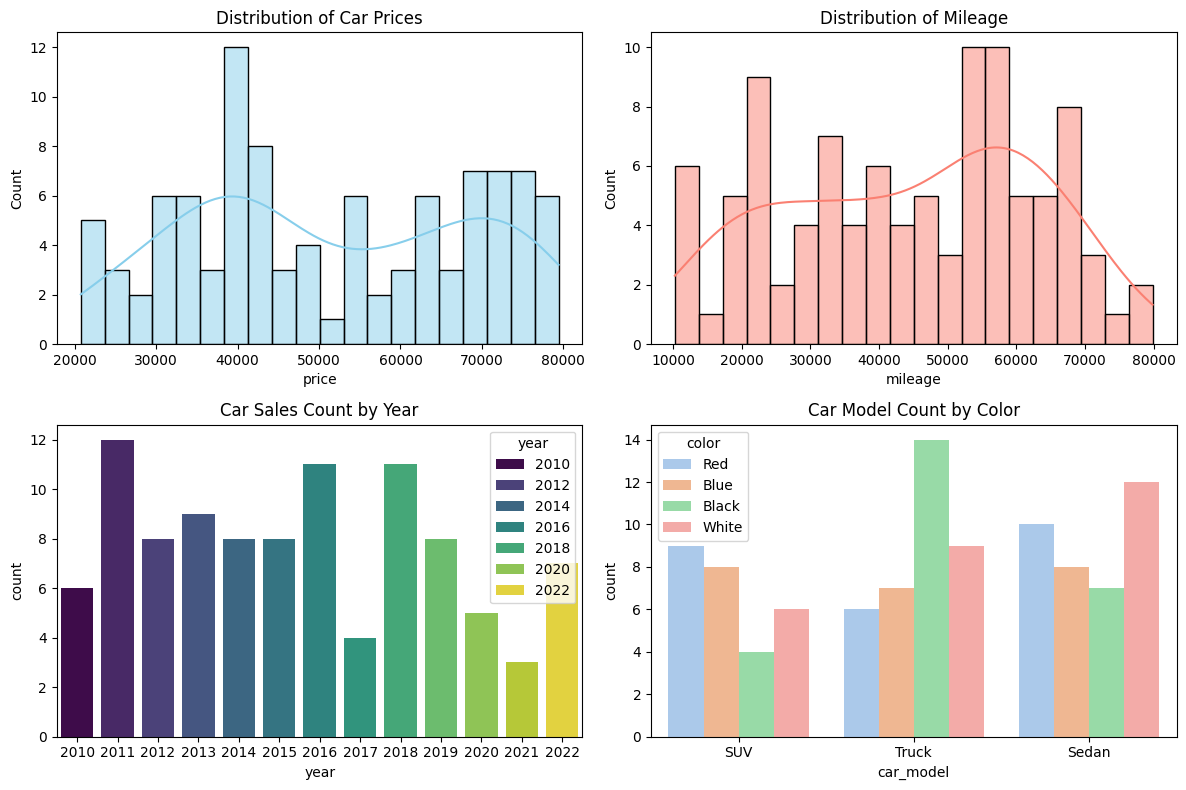

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 차량 판매 데이터 생성
car_sales_data = pd.DataFrame({
    'car_model': np.random.choice(['Sedan', 'SUV', 'Truck'], size=100),
    'price': np.random.randint(20000, 80000, size=100),
    'mileage': np.random.randint(10000, 80000, size=100),
    'year': np.random.randint(2010, 2023, size=100),
    'color': np.random.choice(['Red', 'Blue', 'Black', 'White'], size=100),
})

# 기본 통계 확인
print(car_sales_data.describe())

# 결측치 확인
print(car_sales_data.isnull().sum())

# 범주형 데이터 분포 확인
print(car_sales_data['car_model'].value_counts())

# 시각화
plt.figure(figsize=(12, 8))

# 가격 분포 시각화
plt.subplot(2, 2, 1)
sns.histplot(car_sales_data['price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')

# 주행 거리 분포 시각화
plt.subplot(2, 2, 2)
sns.histplot(car_sales_data['mileage'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Mileage')

# 연도별 판매량 시각화
plt.subplot(2, 2, 3)
sns.countplot(x='year', data=car_sales_data, palette='viridis', hue='year', dodge=False)
plt.title('Car Sales Count by Year')

# 차종별 색상 분포 시각화
plt.subplot(2, 2, 4)
sns.countplot(x='car_model', hue='color', data=car_sales_data, palette='pastel')
plt.title('Car Model Count by Color')

plt.tight_layout()
plt.show()

In [2]:
# 결측치 제거 또는 대체
car_sales_data = car_sales_data.dropna()  # 또는 car_sales_data.fillna(method='ffill') 등

# 다시 결측치 확인
print(car_sales_data.isnull().sum())

car_model    0
price        0
mileage      0
year         0
color        0
dtype: int64


Z-score threshold: 3
Percentage of data kept: 99.00%
Number of outliers removed: 1


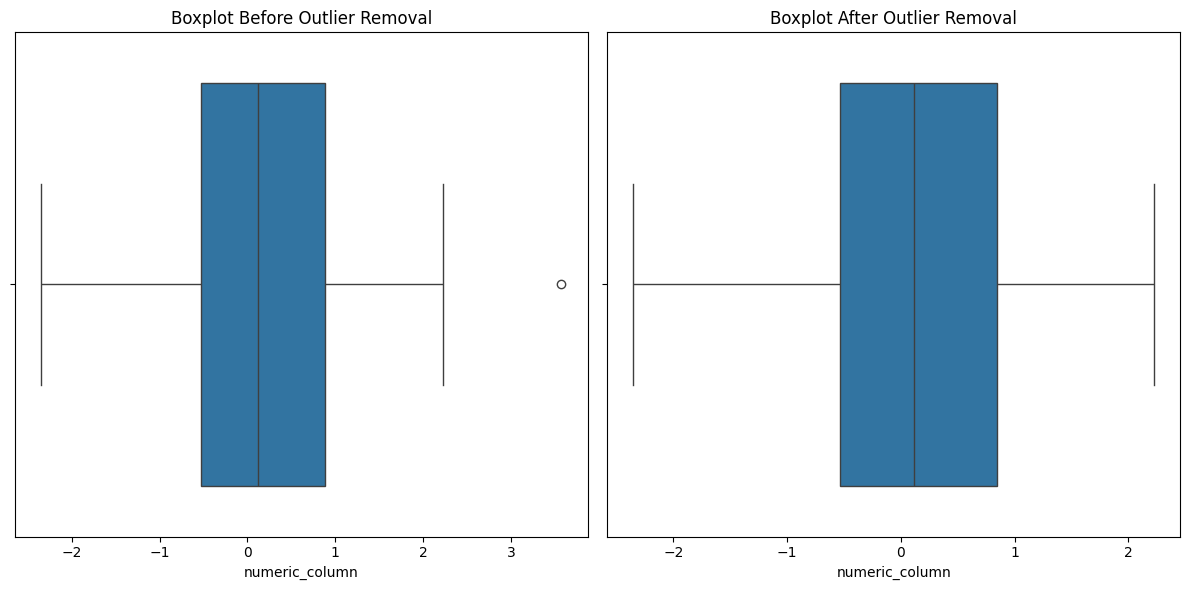

       numeric_column
count       99.000000
mean         0.132365
std          0.936981
min         -2.352076
25%         -0.539124
50%          0.111372
75%          0.848423
max          2.224359


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def z_score_outlier_removal(df, column_name, threshold=3):
    # Calculate Z-scores
    z_scores = stats.zscore(df[column_name])

    # Identify outliers based on the threshold
    outliers = np.abs(z_scores) > threshold

    # Remove outliers from the DataFrame
    df_no_outliers = df[~outliers]

    # Print information about the removal
    print(f"Z-score threshold: {threshold}")
    print(f"Percentage of data kept: {100 * len(df_no_outliers) / len(df):.2f}%")
    print(f"Number of outliers removed: {sum(outliers)}")

    return df_no_outliers

# 예제 데이터프레임과 수치형 열 선택
data = pd.DataFrame({
    'numeric_column': np.random.randn(100),
    'categorical_column': np.random.choice(['A', 'B', 'C'], size=100),
    'date_column': pd.date_range('2024-02-03', periods=100),
})

# Z-score를 이용한 이상치 제거 수행
data_no_outliers = z_score_outlier_removal(data, 'numeric_column')

# 이상치 제거 전후의 박스플롯 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='numeric_column', data=data)
plt.title('Boxplot Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(x='numeric_column', data=data_no_outliers)
plt.title('Boxplot After Outlier Removal')

plt.tight_layout()
plt.show()

# 이상치 제거 후 데이터프레임 통계 확인
print(data_no_outliers.describe())

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50),
                                X, y,
                                scoring='neg_mean_absolute_error', cv=min(3, len(y))).mean()

# 가상의 데이터프레임 생성
data = pd.DataFrame({
    'numeric_column': ['123', '456', '789'],
    'categorical_column': ['A', 'B', 'C'],
    'date_column': ['2022-01-01', '2022-01-02', '2022-01-03'],
})

# 문자열을 숫자로 변환 (예: '123'을 정수로 변환)
data['numeric_column'] = pd.to_numeric(data['numeric_column'], errors='coerce')

# 숫자를 문자열로 변환
data['numeric_column'] = data['numeric_column'].astype(str)

# 날짜 형식 변환
data['date_column'] = pd.to_datetime(data['date_column']).astype(int)  # 날짜를 숫자로 변환

# 카테고리형으로 변환 (예: 'A', 'B', 'C'를 카테고리로 변환)
data['categorical_column'] = data['categorical_column'].astype('category')

# 훈련 데이터와 타겟 설정
train_predictors = data[['numeric_column', 'date_column', 'categorical_column']]
target = np.random.randint(0, 100, size=3)  # 임의의 타겟 값 생성

# 데이터프레임의 크기 맞추기
target = target[:len(train_predictors)]

# 카테고리를 더미 변수로 변환 (One-Hot Encoding)
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)

# MAE 계산
mae_without_categoricals = get_mae(one_hot_encoded_training_predictors, target)

print('Mean Absolute Error with One-Hot Encoding: ' + str(int(mae_without_categoricals)))

Mean Absolute Error with One-Hot Encoding: 21


미션 2) 모델 선택 🧠

분류 문제에 적합한 머신러닝 알고리즘을 선택합니다. 예를 들어, 로지스틱 회귀, 결정 트리, 랜덤 포레스트, 서포트 벡터 머신(SVM), 그라디언트 부스팅 등이 있습니다. 베이스라인 모델 생성하여 성능의 기준점을 설정합니다.

In [5]:
from sklearn.metrics import roc_curve, auc

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# 가상의 데이터프레임 생성
data = pd.DataFrame({
    'feature1': [10, 15, 8, 20, 12],
    'feature2': [0.5, 0.8, 0.3, 0.7, 0.6],
    'category_A': [1, 0, 1, 0, 0],
    'category_B': [0, 1, 0, 0, 1],
    'category_C': [0, 0, 0, 1, 0],
    'target': [0, 1, 0, 1, 1]  # 이진 분류를 위한 target 변수
})

# 피처와 타겟 분리
X = data.drop('target', axis=1)
y = data['target']

# 학습용과 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 초기화
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),  # Set probability=True
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 평가 메트릭 출력
    print(f'\n{model_name} Results:')
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    if len(set(y_test)) == 2:  # Check if there are both positive and negative samples
        print('Classification Report:')
        print(classification_report(y_test, y_pred))
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred))

# 베이스라인 모델 (예: 무조건 다수 클래스로 예측)
baseline_accuracy = y_test.value_counts(normalize=True).max()
print(f'\nBaseline Model Accuracy: {baseline_accuracy}')


Logistic Regression Results:
Accuracy: 1.0

Decision Tree Results:
Accuracy: 1.0

Random Forest Results:
Accuracy: 1.0

SVM Results:
Accuracy: 1.0

Gradient Boosting Results:
Accuracy: 1.0

Baseline Model Accuracy: 1.0


미션 3) 모델 훈련 🤖

데이터셋을 훈련 세트와 테스트 세트로 분할합니다. 일반적으로 데이터의 70-80%를 훈련용으로, 나머지를 테스트용으로 사용합니다. 모델에 학습 데이터셋과 정답을 학습시키고 예측 데이터셋으로 예측을 진행합니다.


Logistic Regression Results:
Training Metrics:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
[[2 0]
 [0 2]]
Testing Metrics:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]


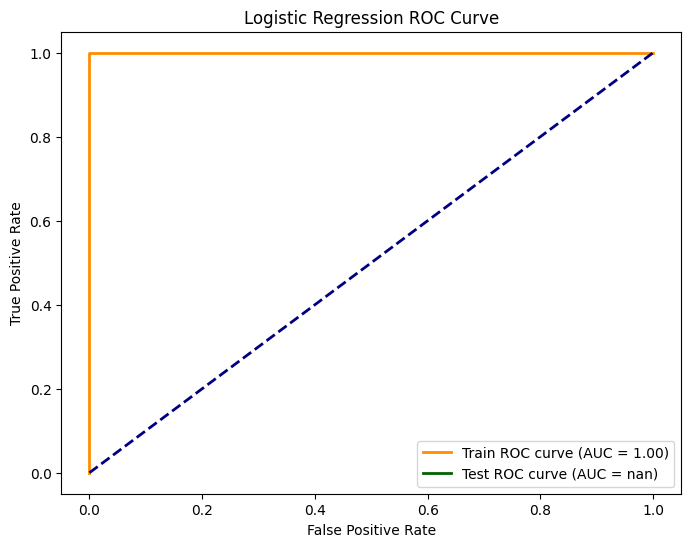


Decision Tree Results:
Training Metrics:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
[[2 0]
 [0 2]]
Testing Metrics:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]


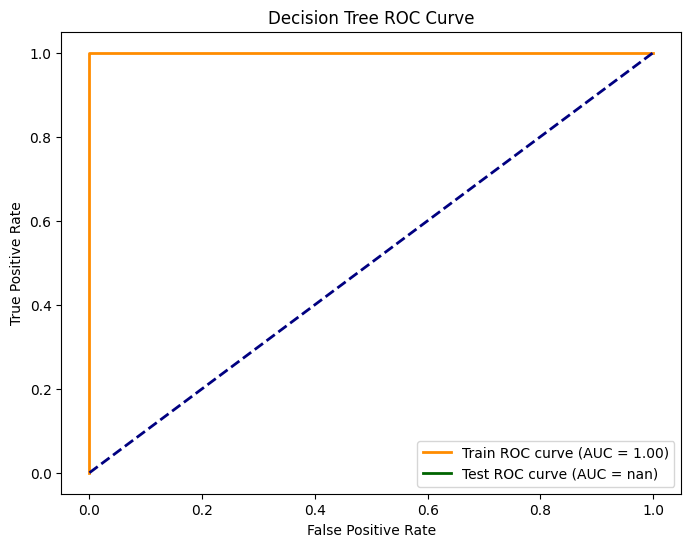


Random Forest Results:
Training Metrics:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
[[2 0]
 [0 2]]
Testing Metrics:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]


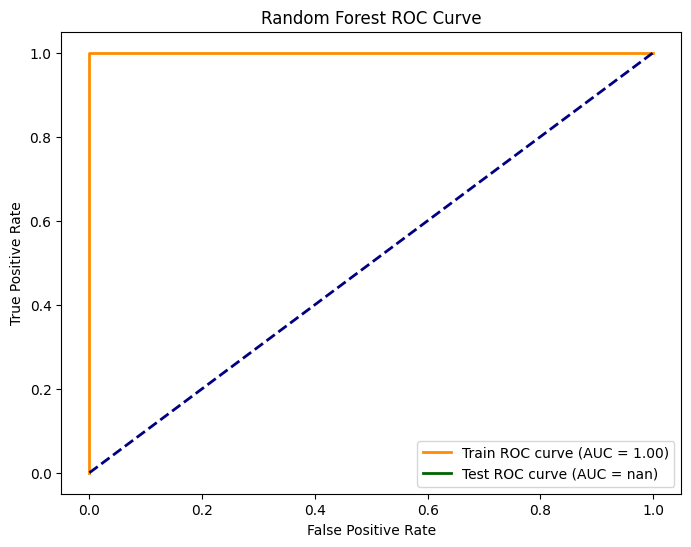


SVM Results:
Training Metrics:
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

Confusion Matrix:
[[2 0]
 [1 1]]
Testing Metrics:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]


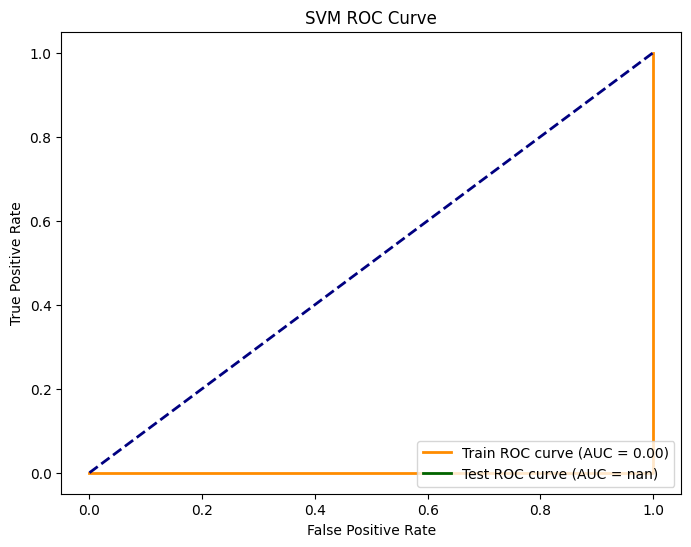


Gradient Boosting Results:
Training Metrics:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
[[2 0]
 [0 2]]
Testing Metrics:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]


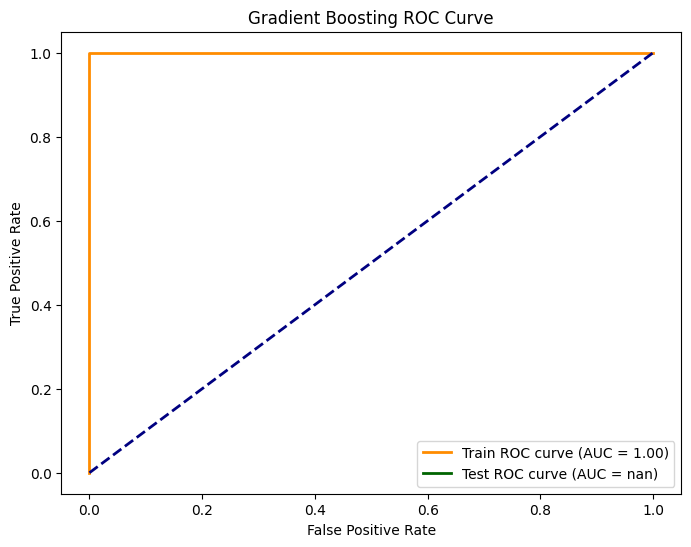

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# 랜덤 포레스트 모델 초기화
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),  # Set probability=True
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# 모델 학습 및 평가
for model_name, model in models.items():
    # 모델 훈련
    model.fit(X_train, y_train)

    # 훈련 데이터에 대한 예측 및 확률 예측
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    # 테스트 데이터에 대한 예측 및 확률 예측
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # 평가 메트릭 출력
    print(f'\n{model_name} Results:')
    print('Training Metrics:')
    print('Accuracy:', accuracy_score(y_train, y_train_pred))
    print('Classification Report:')
    print(classification_report(y_train, y_train_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_train_pred))

    print('Testing Metrics:')
    print('Accuracy:', accuracy_score(y_test, y_test_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_test_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_test_pred))

    # ROC Curve
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UndefinedMetricWarning)

        try:
            fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
            roc_auc_train = auc(fpr_train, tpr_train)
        except UndefinedMetricWarning:
            print(f'Warning: UndefinedMetricWarning for {model_name} on training set')

        try:
            fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
            roc_auc_test = auc(fpr_test, tpr_test)
        except UndefinedMetricWarning:
            print(f'Warning: UndefinedMetricWarning for {model_name} on testing set')

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='darkgreen', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

미션 4) 하이퍼파라미터 튜닝 ⚙️

그리드 서치, 랜덤 서치 등을 활용하여 모델의 하이퍼파라미터를 조정하여 모델의 성능을 최적화합니다. 이 때, 모델의 일반화 성능을 평가하기 위해 교차 검증을 수행합니다.
(참고) xgboost, lightGBM, catBoost는 하이퍼파라미터 튜닝 기능을 제공합니다.
미션 5) 모델 평가 및 선택 🎯

학습된 모델을 테스트 데이터 또는 새로운 데이터에 적용하여 성능을 평가합니다. 이때 사용할 평가 지표는 태스크에 따라 다를 수 있습니다. 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1-score 등을 고려합니다.

In [41]:
from sklearn.model_selection import GridSearchCV

# Check the number of samples in X_train
num_samples = len(X_train)
if num_samples < 5:
    print("Not enough samples for cross-validation.")
else:
    # Continue with grid search
    # 랜덤 포레스트 모델 초기화
    model = RandomForestClassifier(random_state=42)

    # 하이퍼파라미터 그리드 설정
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # 그리드 서치 객체 생성
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

    # 모델 훈련 및 최적의 하이퍼파라미터 탐색
    grid_search.fit(X_train, y_train)

    # 최적의 하이퍼파라미터 출력
    print("Best Hyperparameters:", grid_search.best_params_)

    # 최적의 모델 저장
    best_model = grid_search.best_estimator_

Not enough samples for cross-validation.


In [45]:
num_classes = len(np.unique(y_train))

In [55]:
if num_classes < stratified_cv.n_splits:
    raise ValueError(f"n_splits={stratified_cv.n_splits} cannot be greater than the number of classes ({num_classes}).")

In [51]:
print(num_classes)
print(stratified_cv)

2
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)


In [53]:
print(stratified_cv.get_n_splits())

2


In [54]:
if num_classes > stratified_cv.get_n_splits():
    raise ValueError(f"n_splits={stratified_cv.get_n_splits()} cannot be greater than the number of classes ({num_classes}).")

In [52]:
stratified_cv = StratifiedKFold(n_splits=2)

In [58]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 랜덤 포레스트 모델 초기화
model = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# StratifiedKFold를 사용하여 그리드 서치 객체 생성
stratified_cv = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(model, param_grid, cv=stratified_cv, scoring='accuracy')

# 모델 훈련 및 최적의 하이퍼파라미터 탐색
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 모델 저장
best_model = grid_search.best_estimator_

# 최적의 모델을 사용하여 테스트 데이터에 대한 예측
y_test_pred = best_model.predict(X_test)

# 평가 메트릭 출력
print('Testing Metrics for Best Model:')
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Classification Report:')
print(classification_report(y_test, y_test_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

ValueError: n_splits=3 cannot be greater than the number of members in each class.